Acces ORBIS database through Bocconi Library: https://unibocconi.libguides.com/az.php?a=o

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import raw Orbis and process

Open the .xlxs files downloaded from Orbis and convert to single .csv

In [2]:
# df = pd.concat([
# pd.read_excel('./data/Orbis_1_15000.xlsx', sheet_name='Results', index_col=0),
# pd.read_excel('./data/Orbis_15001_31710.xlsx', sheet_name='Results', index_col=0)
# ], ignore_index=True)

# df.head()

Work on the single .csv

In [2]:
df = pd.read_csv('./data/Orbis_all.csv', index_col = 0, low_memory=False)
print(df.shape)
df.columns

(31710, 56)


Index(['Company name Latin alphabet', 'Inactive', 'Quoted', 'Branch',
       'OwnData', 'Woco', 'Country ISO code', 'Consolidation code',
       'Last avail. year', 'Number of employees\nLast avail. yr',
       'BvD sectors', 'BvD ID number', 'US SIC, primary code(s)',
       'Number of publications', 'R&D expenses / Operating revenue\n2023',
       'R&D expenses / Operating revenue\n2022',
       'R&D expenses / Operating revenue\n2021',
       'R&D expenses / Operating revenue\n2020',
       'R&D expenses / Operating revenue\n2019',
       'R&D expenses / Operating revenue\n2018',
       'R&D expenses / Operating revenue\n2017',
       'Acquisition of Business\nm USD 2023',
       'Acquisition of Business\nm USD 2022',
       'Acquisition of Business\nm USD 2021',
       'Acquisition of Business\nm USD 2020',
       'Acquisition of Business\nm USD 2019',
       'Acquisition of Business\nm USD 2018',
       'Acquisition of Business\nm USD 2017',
       'Operating revenue (Turnover)\nm

Create a new year columns and convert columns accordingly  
Years from 2017 to 2023 included.
Yearly columns:
- R&D expenses / Operating revenue\nYEAR
- Acquisition of Business\nm USD YEAR
- Operating revenue (Turnover)\nm USD YEAR
- Operating profit (loss) [EBIT]\nm USD YEAR
- Profit (loss) for the period [Net income]\nm USD YEAR
- Total equity\nm USD YEAR

In [4]:
df.sort_values(by=['Company name Latin alphabet'])['Company name Latin alphabet'].value_counts()

Company name Latin alphabet
GATEWAY DISTRIPARKS LIMITED                       3
MARINETRANS INDIA LIMITED                         2
CHAVDA INFRA LIMITED                              2
BARCLAYS GLOBAL SERVICE CENTRE PRIVATE LIMITED    2
PROTEAN EGOV TECHNOLOGIES LIMITED                 2
                                                 ..
HARDESH ORES PRIVATE LIMITED                      1
HARDEODAS JAGANNATH PVT LTD                       1
HARDCASTLE RESTAURANTS PRIVATE LIMITED            1
HARDCASTLE PETROFER PRIVATE LIMITED               1
ZYWIE VENTURES PRIVATE LIMITED                    1
Name: count, Length: 31553, dtype: int64

In [5]:
# Convert columns which contains
id_vars = ['Company name Latin alphabet', 'Inactive', 'Quoted', 'Branch', 'OwnData', 'Woco', 'Country ISO code', 'Consolidation code', 'Last avail. year', 'Number of employees\nLast avail. yr', 'BvD sectors', 'BvD ID number', 'US SIC, primary code(s)', 'Number of publications']
df_melted = df.melt(id_vars=id_vars, var_name='MetricYear', value_name='Value')
df_melted['Year'] = df_melted['MetricYear'].str.extract(r'(\d{4})')
df_melted['Metric'] = df_melted['MetricYear'].str.replace(r'\n?\d{4}', '', regex=True).str.strip()
df_pivoted = df_melted.pivot_table(index=id_vars + ['Year'], columns='Metric', values='Value', aggfunc='first').reset_index()

In [6]:
print(df_pivoted.shape)
df_pivoted.columns

(206038, 21)


Index(['Company name Latin alphabet', 'Inactive', 'Quoted', 'Branch',
       'OwnData', 'Woco', 'Country ISO code', 'Consolidation code',
       'Last avail. year', 'Number of employees\nLast avail. yr',
       'BvD sectors', 'BvD ID number', 'US SIC, primary code(s)',
       'Number of publications', 'Year', 'Acquisition of Business\nm USD',
       'Operating profit (loss) [EBIT]\nm USD',
       'Operating revenue (Turnover)\nm USD',
       'Profit (loss) for the period [Net income]\nm USD',
       'R&D expenses / Operating revenue', 'Total equity\nm USD'],
      dtype='object', name='Metric')

In [7]:
df_pivoted.head()

Metric,Company name Latin alphabet,Inactive,Quoted,Branch,OwnData,Woco,Country ISO code,Consolidation code,Last avail. year,Number of employees\nLast avail. yr,...,BvD ID number,"US SIC, primary code(s)",Number of publications,Year,Acquisition of Business\nm USD,Operating profit (loss) [EBIT]\nm USD,Operating revenue (Turnover)\nm USD,Profit (loss) for the period [Net income]\nm USD,R&D expenses / Operating revenue,Total equity\nm USD
0,102 MOTHER CHILD SERVICES (UP),No,No,No,No,No,IN,U1,2022,n.a.,...,IN0020654917,8361.0,n.a.,2017,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
1,102 MOTHER CHILD SERVICES (UP),No,No,No,No,No,IN,U1,2022,n.a.,...,IN0020654917,8361.0,n.a.,2018,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
2,102 MOTHER CHILD SERVICES (UP),No,No,No,No,No,IN,U1,2022,n.a.,...,IN0020654917,8361.0,n.a.,2019,n.a.,-9.16333275412498,16.4247276494055,-9.33514604746029,n.a.,n.a.
3,102 MOTHER CHILD SERVICES (UP),No,No,No,No,No,IN,U1,2022,n.a.,...,IN0020654917,8361.0,n.a.,2020,n.a.,-7.82031342646144,32.5406724744804,-7.99506143343709,n.a.,n.a.
4,102 MOTHER CHILD SERVICES (UP),No,No,No,No,No,IN,U1,2022,n.a.,...,IN0020654917,8361.0,n.a.,2021,n.a.,1.12804739676602,44.7186486728517,0.992228981101885,n.a.,n.a.


In [8]:
df_pivoted.to_csv('./data/Orbis_processed.csv')

# Main

In [61]:
df = pd.read_csv('./data/Orbis_processed.csv', index_col = 0, na_values='n.a.')

# For faster access
df.rename(columns={
    'Company name Latin alphabet': 'Name',
    'US SIC, primary code(s)': 'SIC',
    'Operating profit (loss) [EBIT]\nm USD': 'EBIT',
    'Operating revenue (Turnover)\nm USD': 'Turnover',
    'Profit (loss) for the period [Net income]\nm USD': 'Profit',
    'Total equity\nm USD': 'Equity',
}, inplace=True)

# Reduce for analysis
df = df[['Name', 'SIC', 'Year', 'EBIT', 'Turnover', 'Profit', 'Equity']]
df

C:\Users\giaco\AppData\Local\Temp\ipykernel_18368\201985985.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/Orbis_processed.csv', index_col = 0, na_values='n.a.')


,Name,SIC,Year,EBIT,Turnover,Profit,Equity
0,102 MOTHER CHILD SERVICES (UP),8361.0,2017,NaN,NaN,NaN,NaN
1,102 MOTHER CHILD SERVICES (UP),8361.0,2018,NaN,NaN,NaN,NaN
2,102 MOTHER CHILD SERVICES (UP),8361.0,2019,-9.163333,16.424728,-9.335146,NaN
3,102 MOTHER CHILD SERVICES (UP),8361.0,2020,-7.820313,32.540672,-7.995061,NaN
4,102 MOTHER CHILD SERVICES (UP),8361.0,2021,1.128047,44.718649,0.992229,NaN
...,...,...,...,...,...,...,...
206033,ZYWIE VENTURES PRIVATE LIMITED,7389.0,2019,NaN,NaN,NaN,NaN
206034,ZYWIE VENTURES PRIVATE LIMITED,7389.0,2020,NaN,NaN,NaN,NaN
206035,ZYWIE VENTURES PRIVATE LIMITED,7389.0,2021,-8.415004,16.296693,-8.197583,NaN
206036,ZYWIE VENTURES PRIVATE LIMITED,7389.0,2022,6.975440,23.723165,7.091839,NaN


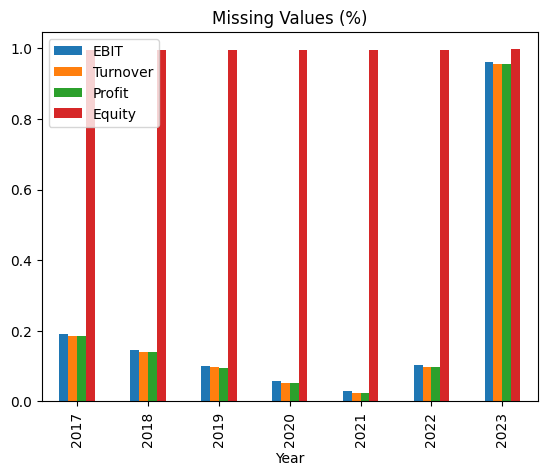

In [62]:
# Visualize Nulls
temp = df.set_index('Year').copy()
temp = temp.isna().astype(float).groupby(temp.index).sum().iloc[:, 2:]
temp = temp / (df.shape[0] / 7) # number of observations per year
temp['Year'] = temp.index
temp.plot(x='Year', kind='bar', title='Missing Values (%)')
plt.show()

In [63]:
df = df.drop(columns=['Equity'])    # too many NAs
df = df.dropna().reset_index(drop=True)        # filter the rest
df.head()

,Name,SIC,Year,EBIT,Turnover,Profit
0,102 MOTHER CHILD SERVICES (UP),8361.0,2019,-9.163333,16.424728,-9.335146
1,102 MOTHER CHILD SERVICES (UP),8361.0,2020,-7.820313,32.540672,-7.995061
2,102 MOTHER CHILD SERVICES (UP),8361.0,2021,1.128047,44.718649,0.992229
3,102 MOTHER CHILD SERVICES (UP),8361.0,2022,3.498673,49.819710,3.384219
4,108 EMERGENCY MEDICAL TRANSPORT SERVICES EAST ...,8361.0,2019,-0.713885,15.468825,-0.837236


To conduct the analysis, I need to compute the following 3 metrics:  
- Revenue Growth (% increase compared to previous year)
- Operating Margin (EBIT / Turnover)
- RoE (Profit / Equity)

In [64]:
# Operating Margin
df['OM'] = df.EBIT / df.Turnover

# Revenue Growth
df = df.sort_values(by=['Name', 'Year'])
df['Growth'] = df.groupby('Name')['Turnover'].apply(lambda x: x.pct_change()).values

# Remove infs
df = df.replace(np.inf, np.nan)
df = df.replace(-np.inf, np.nan)


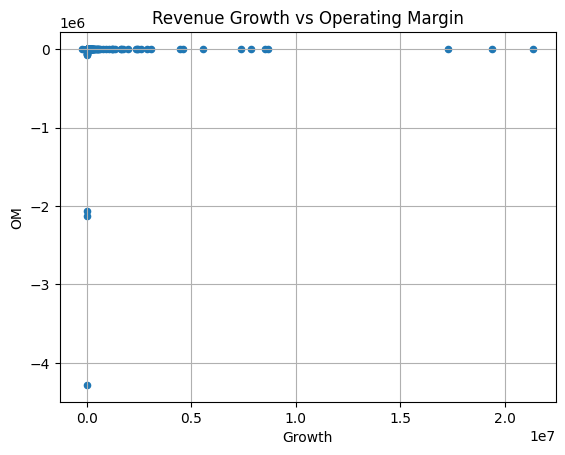

In [65]:
df.plot(x = 'Growth', y = 'OM', kind='scatter', title='Revenue Growth vs Operating Margin')
plt.grid()

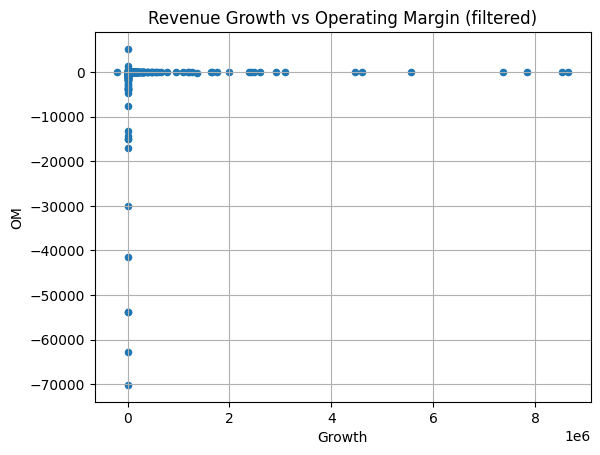

In [66]:
# Drop outliers
df = df.loc[df.Growth < 1e7]
df = df.loc[df.OM > -2e6].copy()
df.plot(x = 'Growth', y = 'OM', kind='scatter', title='Revenue Growth vs Operating Margin (filtered)')
plt.grid()

Retrieve the major industrial group from the first 2 digits of the SIC code

In [67]:
def lookup(x):
    if 1 <= x <= 9:
        return 'Agriculture, Forestry, and Fishing'
    elif 10 <= x <= 14:
        return 'Mining'
    elif 15 <= x <= 17:
        return 'Construction'
    elif 20 <= x <= 39:
        return 'Manufacturing'
    elif 40 <= x <= 49:
        return 'Transportation, Communications, Electric, Gas, and Sanitary Services'
    elif 50 <= x <= 51:
        return 'Wholesale Trade'
    elif 52 <= x <= 59:
        return 'Retail Trade'
    elif 60 <= x <= 67:
        return 'Finance, Insurance, and Real Estate'
    elif 70 <= x <= 89:
        return 'Services'
    elif 90 <= x <= 99:
        return 'Public Administration'
    else:
        return 'Unknown'

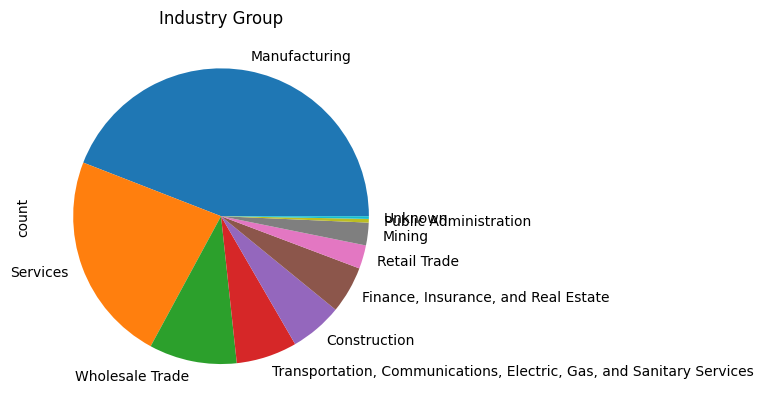

In [68]:
df['Industry'] = df.SIC.astype(str).str[:2].astype(int).apply(lookup)

df.Industry.value_counts().plot(kind='pie', title='Industry Group')
plt.show()

In [69]:
def is_above_industry_avg(x, metric, industry_avg):
    if x[metric] > industry_avg.loc[x.Industry, metric]:
        return 1
    else:
        return 0

In [70]:
df.to_csv('./save/Orbis_final.csv')

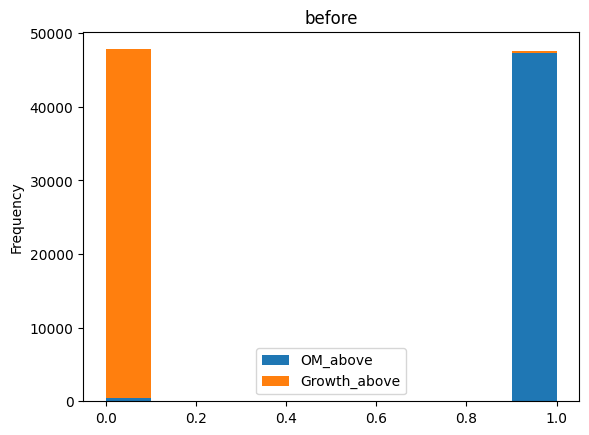

,,OM_above,Growth_above
Name,Industry,,
ADANI SOLAR ENERGY JODHPUR FIVE LIMITED,Services,True,True
ADVANCE METAL POWDER PRIVATE LIMITED,Wholesale Trade,True,True
AGRANI FOODS AND AGRO CORPORATION PRIVATE LIMITED,Manufacturing,True,True
ALPHA ALTERNATIVES FINANCIAL SERVICES PRIVATE LIMITED,"Finance, Insurance, and Real Estate",True,True
AMBICON VENTURES PRIVATE LIMITED,Wholesale Trade,True,True
...,...,...,...
VASUDHA SWARAJ PRIVATE LIMITED,Unknown,True,True
VIABLE RECOMMERCE INDIA PRIVATE LIMITED,Services,True,True
WALTAIR COAL PRIVATE LIMITED,Wholesale Trade,True,True


(79, 2)


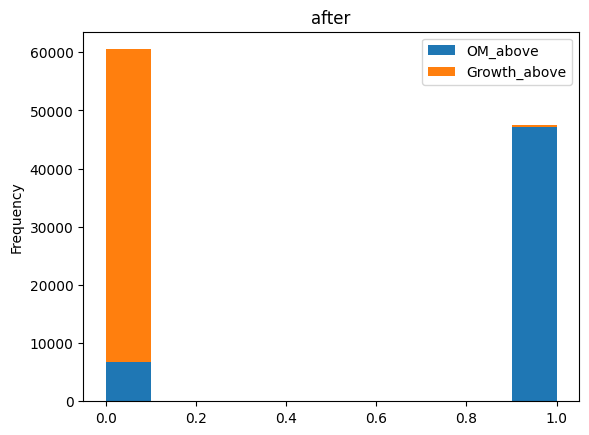

,,OM_above,Growth_above
Name,Industry,,
AMBEY IRON PRIVATE LIMITED,Mining,True,True
AML BUSINESS SOLUTIONS PRIVATE LIMITED,Retail Trade,True,True
AZENTIO SOFTWARE PRIVATE LIMITED,Services,True,True
BARENTZ INDIA PRIVATE LIMITED,Wholesale Trade,True,True
CAPOVITEZ PRIVATE LIMITED,Manufacturing,True,True
CASTLE ROCK FISHERIES PRIVATE LIMITED,Public Administration,True,True
CLICKTECH RETAIL PRIVATE LIMITED,Retail Trade,True,True
COVERTEK CERAMICA PRIVATE LIMITED,Manufacturing,True,True
CREDAVENUE SECURITIES PRIVATE LIMITED,"Finance, Insurance, and Real Estate",True,True


(52, 2)


In [71]:
for time in ['before', 'after']:
    if time == 'before':
        temp = df.loc[df.Year < 2020].copy()
    else:
        temp = df.loc[df.Year > 2020].copy()
    
    industry_avg = temp.groupby('Industry')[['OM', 'Growth']].mean()

    temp['OM_above'] = temp.apply(lambda x: is_above_industry_avg(x, 'OM', industry_avg), axis = 1)
    temp['Growth_above'] = temp.apply(lambda x: is_above_industry_avg(x, 'Growth', industry_avg), axis=1)
    temp.plot(y=['OM_above', 'Growth_above'], kind = 'hist', stacked=True, title=time)
    plt.show()

    # Check if consinstently breakaway
    temp = temp.groupby(['Name', 'Industry'])[['OM_above', 'Growth_above']].all()
    temp = temp.loc[(temp.OM_above == 1) & (temp.Growth_above == 1)]
    display(temp)
    print(temp.shape)

    temp.reset_index().loc[:, ['Name', 'Industry']].to_csv(f'./save/breakaway_{time}.csv')

# Resilient Analysis

In [72]:
breakaway_before = pd.read_csv('./save/breakaway_before.csv', index_col = 0)
breakaway_after = pd.read_csv('./save/breakaway_after.csv', index_col = 0)

In [73]:
breakaway_after.Name.isin(breakaway_before.Name).sum()

0